In [1]:
from env import RandomWalk
from policy import equiprobable_policy
from algo import td0

import matplotlib.pyplot as plt
import numpy as np

plt.style.available
plt.style.use('seaborn-v0_8-bright')

In [2]:
env = RandomWalk()
initial_V = np.zeros(env.observation_space.n)
np.random.seed(1)
initial_V[1:-1] = 0.5
V_star, estimates_over_time = td0(env, equiprobable_policy(env), alpha=0.1, gamma=1, n_episodes=1_000, initial_V=initial_V)

100%|██████████| 1000/1000 [00:00<00:00, 16853.19it/s]


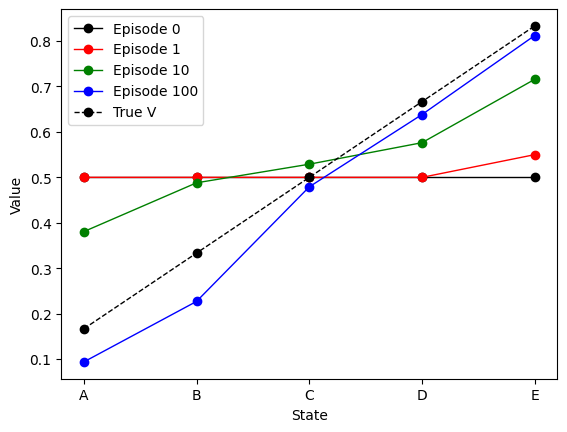

In [3]:
episodes_of_interest = [0, 1, 10, 100]
true_V = np.arange(1, 6) / 6
x = np.arange(1, 6)
line_colors = ['black', 'red', 'green', 'blue']
for i, ep_idx in enumerate(episodes_of_interest):
    plt.plot(x, estimates_over_time[ep_idx][1:6], label=f'Episode {ep_idx}', color=line_colors[i], marker='o', linewidth=1)
plt.plot(x,true_V, label='True V', color='black', linestyle='--', marker='o', linewidth=1)
plt.xlabel('State')
plt.ylabel('Value')
plt.xticks(np.arange(1, 6), ['A', 'B', 'C', 'D', 'E'])

plt.legend()
